In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [127]:
from sklearn.datasets import make_blobs

In [253]:
X,y = make_blobs(
                    n_samples=300,
                    n_features=2,
                    centers = 3,
                    cluster_std = 2.5,
                    shuffle = True
)

In [254]:
X.shape,y.shape

((300, 2), (300,))

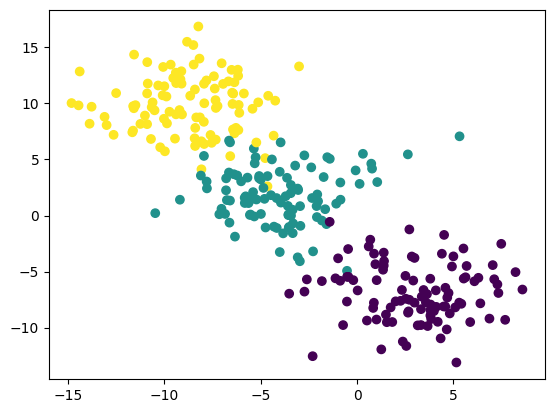

In [255]:
plt.scatter(
    x = X[:,0], # Always the X1
    y = X[:,1], # Always the X2
    c = y # The predicted value 
)

In [256]:
from sklearn.cluster import AgglomerativeClustering

In [257]:
aglc = AgglomerativeClustering(
    linkage = 'ward',
    n_clusters = 3
)

In [258]:
y_pred = aglc.fit_predict(X)

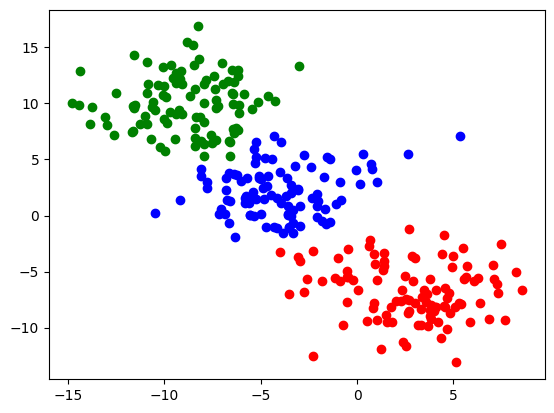

In [259]:
# The number of scatter here is equat to the centers and the cluster (just for visualization in the scenario)
plt.scatter(
    x = X[y_pred==0,0],
    y = X[y_pred==0,1],
    c = 'red'
)
plt.scatter(
    x = X[y_pred==1,0],
    y = X[y_pred==1,1],
    c = 'green'
)
plt.scatter(
    x = X[y_pred==2,0],
    y = X[y_pred==2,1],
    c = 'blue'
)

In [260]:
# For 3d we can use 3dplot and for futher dimensions we can use PCA.
# fig_3d = px.scatter_3d(  
#                 x = X[:,0],
#                 y = X[:,1],
#                 z = X[:,2],
#                 color = y_pred
# )
# fig_3d.show()

In [261]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [262]:
silhouette_score(X,y_pred) # It measures "fit."

0.5452924018953221

In [263]:
davies_bouldin_score(X,y_pred) # It measures "separation."

0.6232650885854887

In [264]:
import scipy.cluster.hierarchy as sch

In [265]:
Z = sch.linkage(
    X,
    method = 'ward'
)

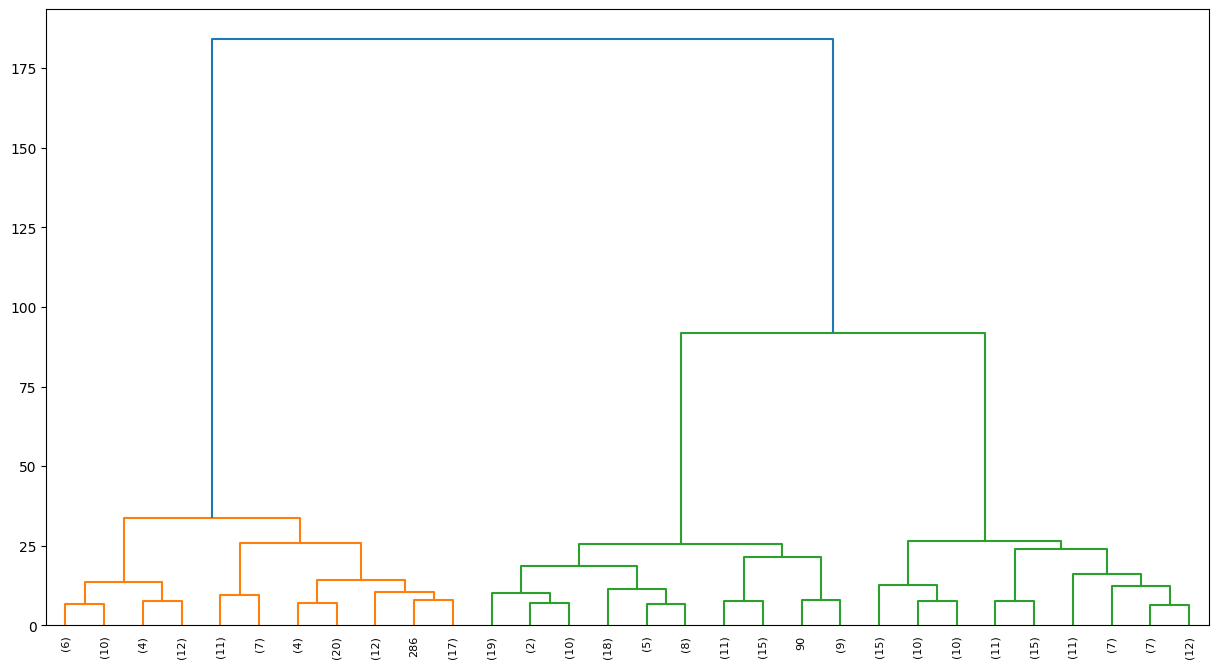

In [266]:
plt.figure(figsize=(15,8))
sch.dendrogram(
    Z,
    leaf_font_size=8,
    leaf_rotation=90.,
    truncate_mode = 'lastp'
)
plt.show()

Clusters : 2 		 Silhouette score 0.5770403812189113 		  Davies-Bouldin Index 0.5481036982450977


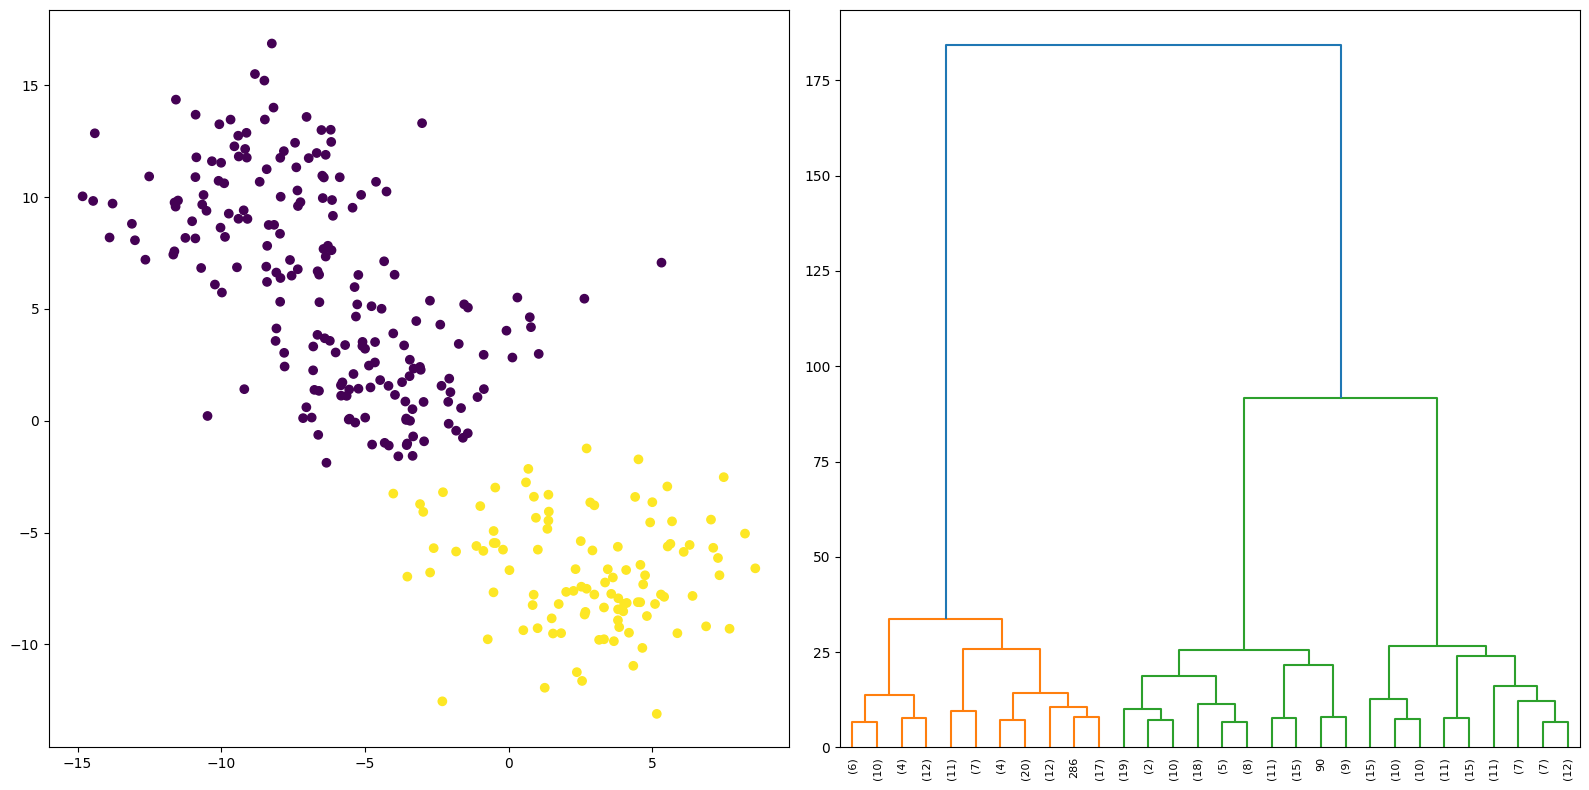

Clusters : 3 		 Silhouette score 0.5452924018953221 		  Davies-Bouldin Index 0.6232650885854887


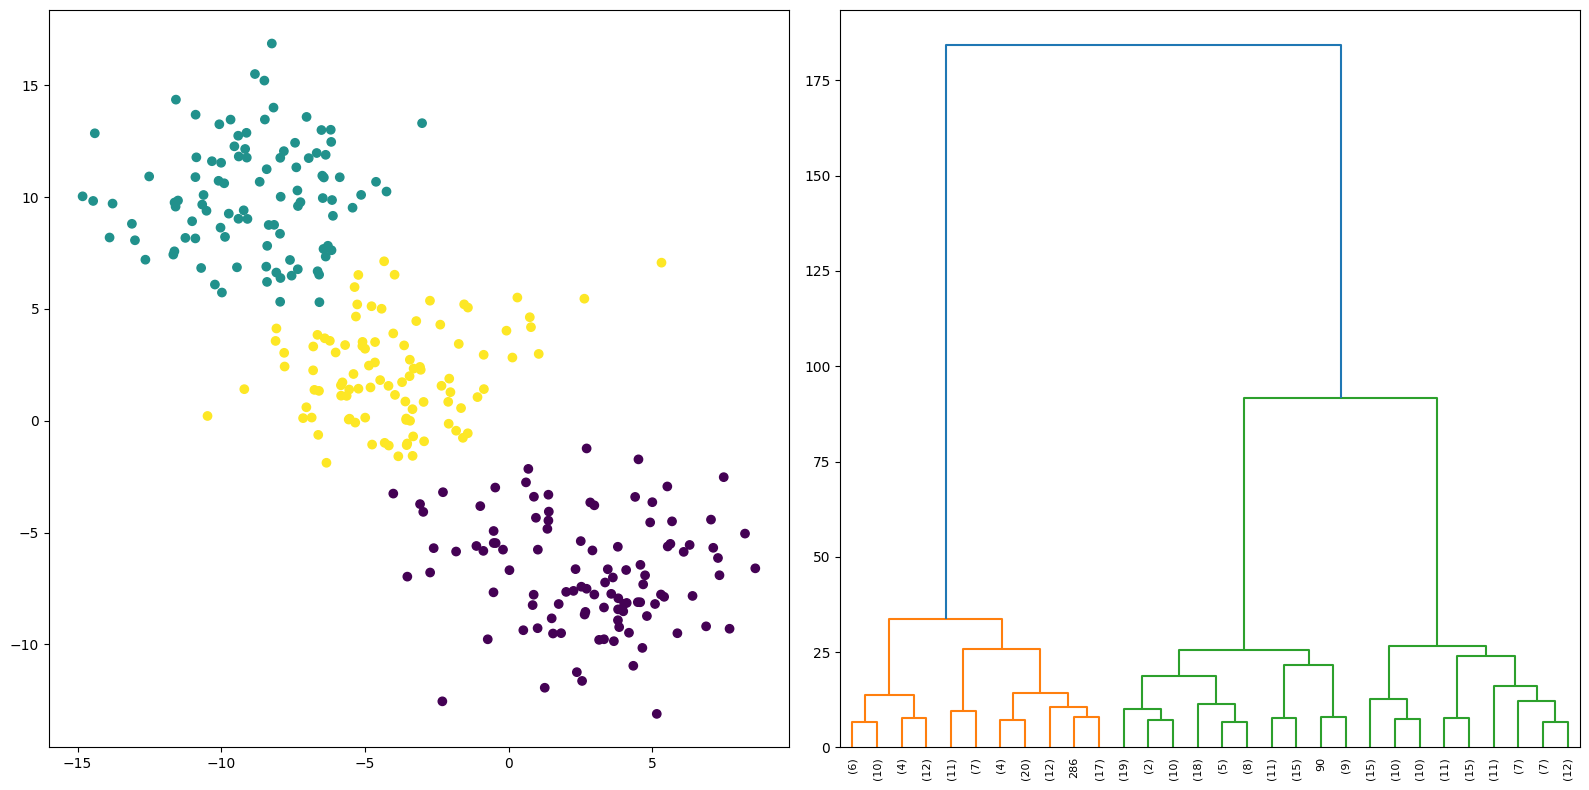

Clusters : 4 		 Silhouette score 0.44756290647639996 		  Davies-Bouldin Index 0.8083280723989064


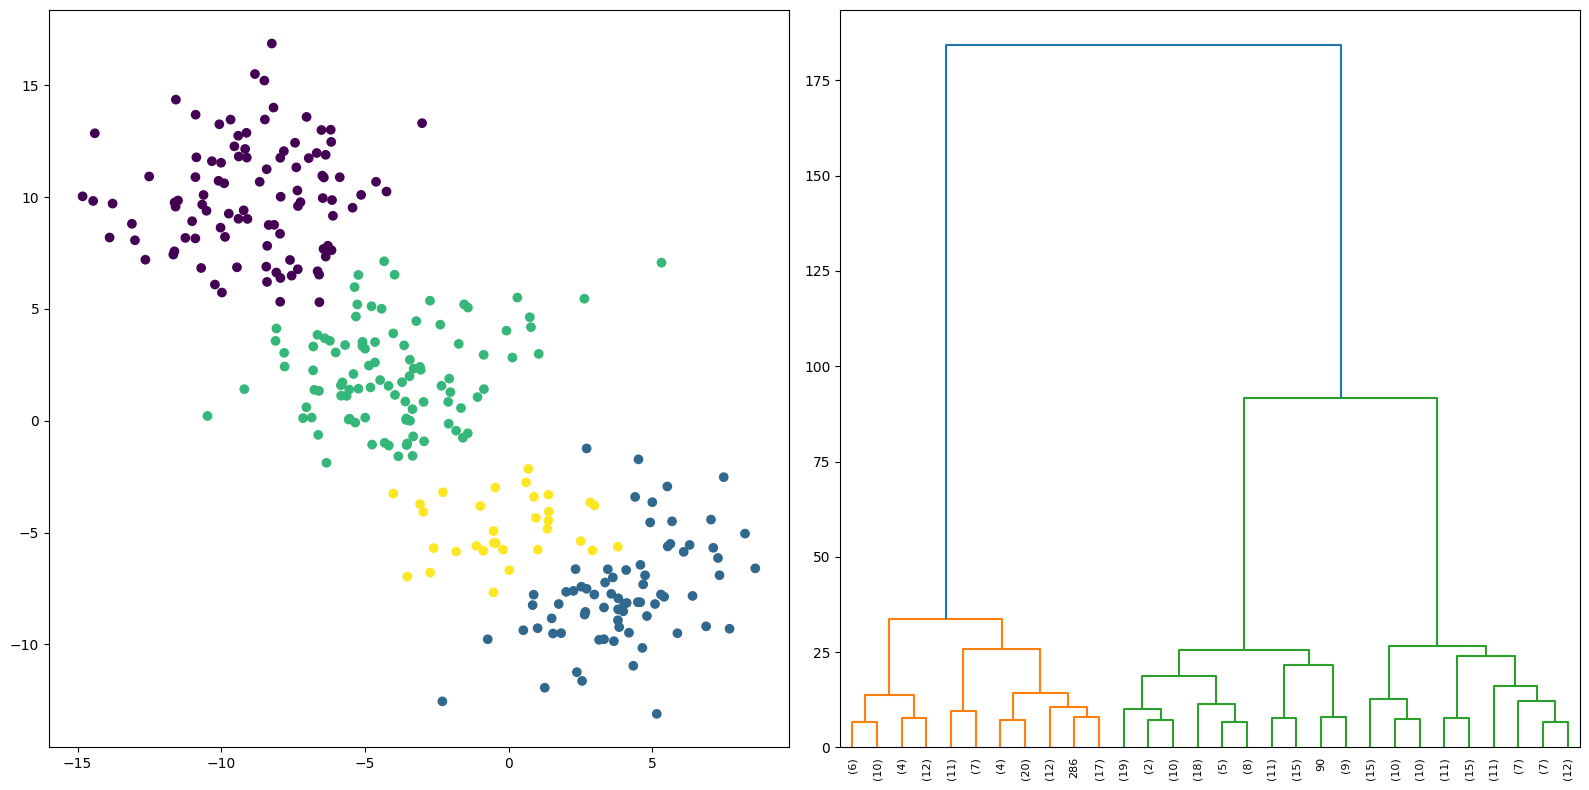

Clusters : 5 		 Silhouette score 0.336600267232383 		  Davies-Bouldin Index 1.0014780274285424


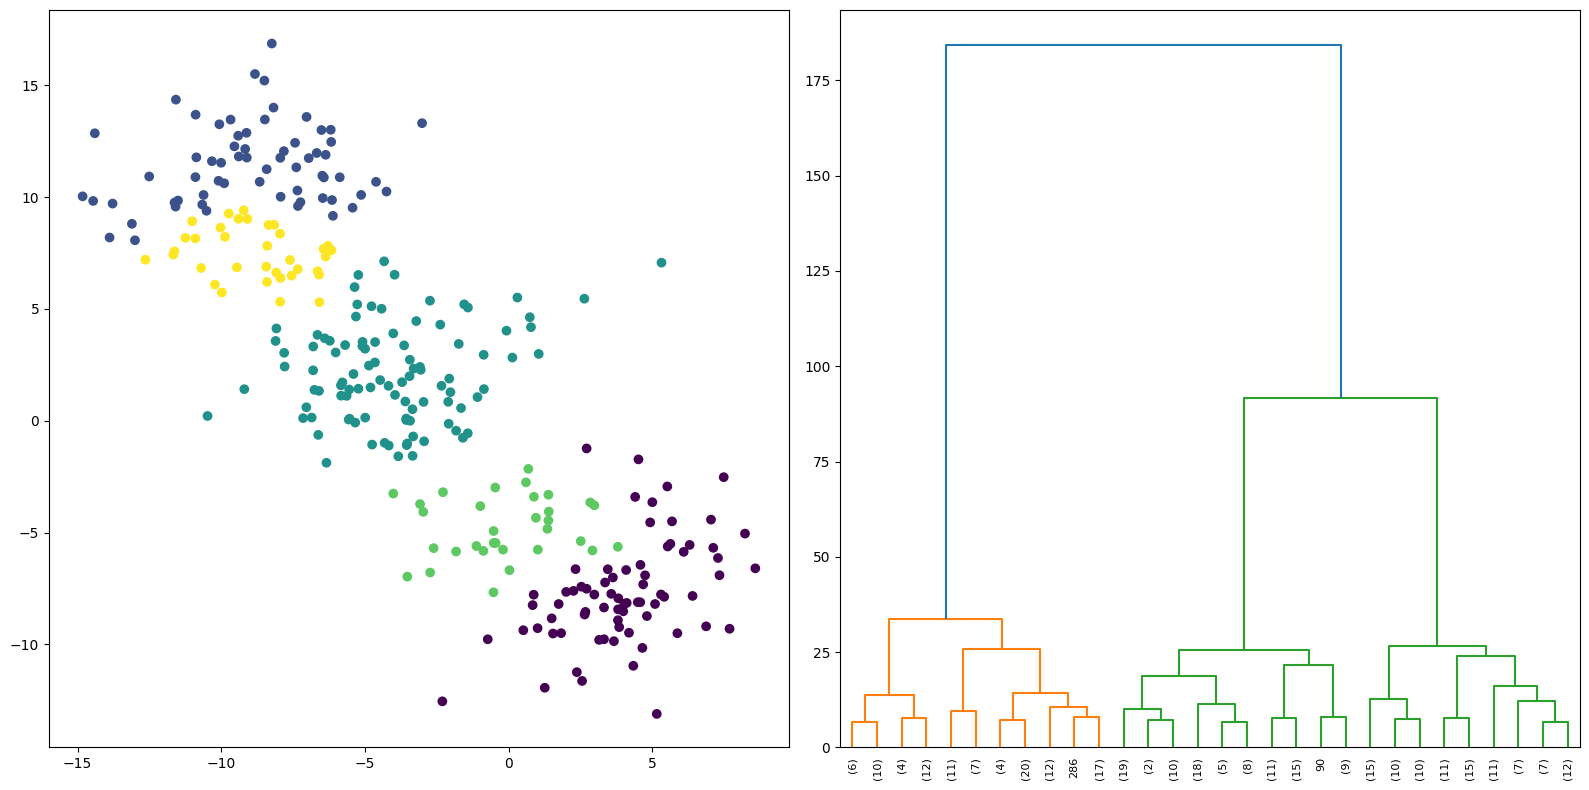

Clusters : 6 		 Silhouette score 0.34893871171038493 		  Davies-Bouldin Index 0.9111094287215386


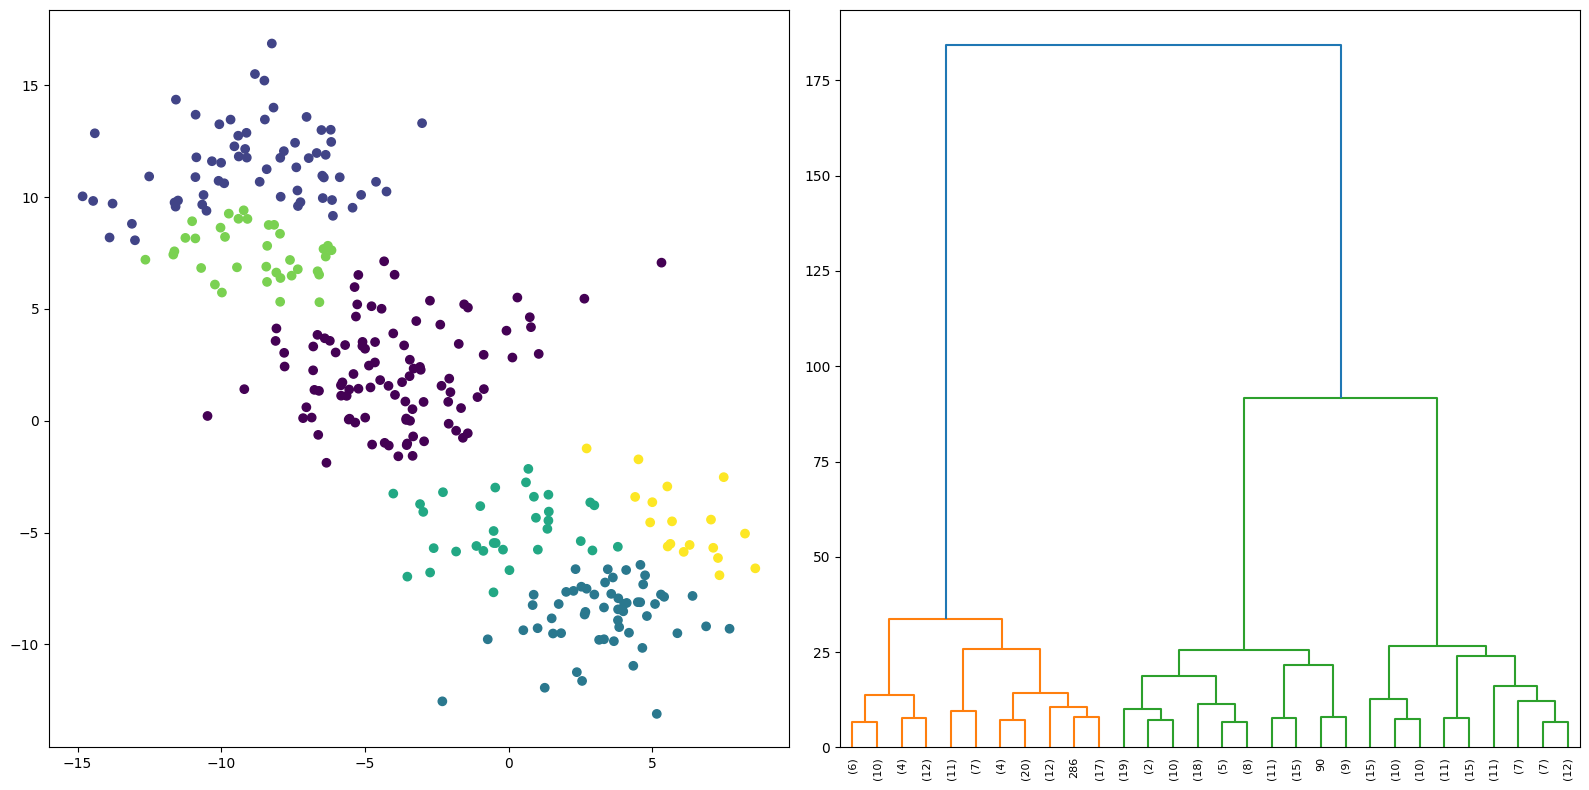

Clusters : 7 		 Silhouette score 0.32236403462623725 		  Davies-Bouldin Index 1.04572514430129


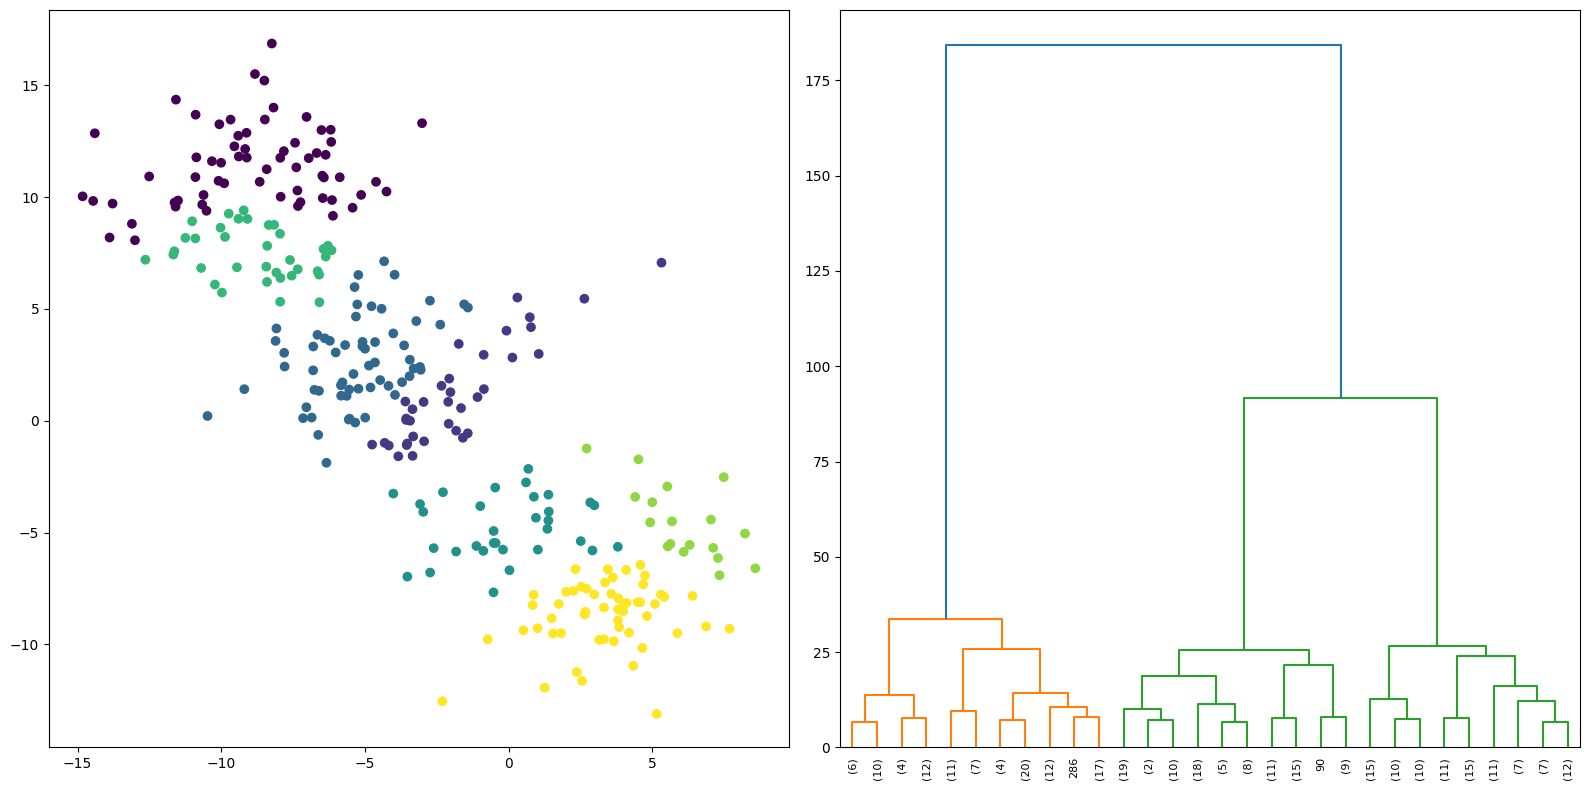

Clusters : 8 		 Silhouette score 0.3379585293583114 		  Davies-Bouldin Index 0.9702911723630151


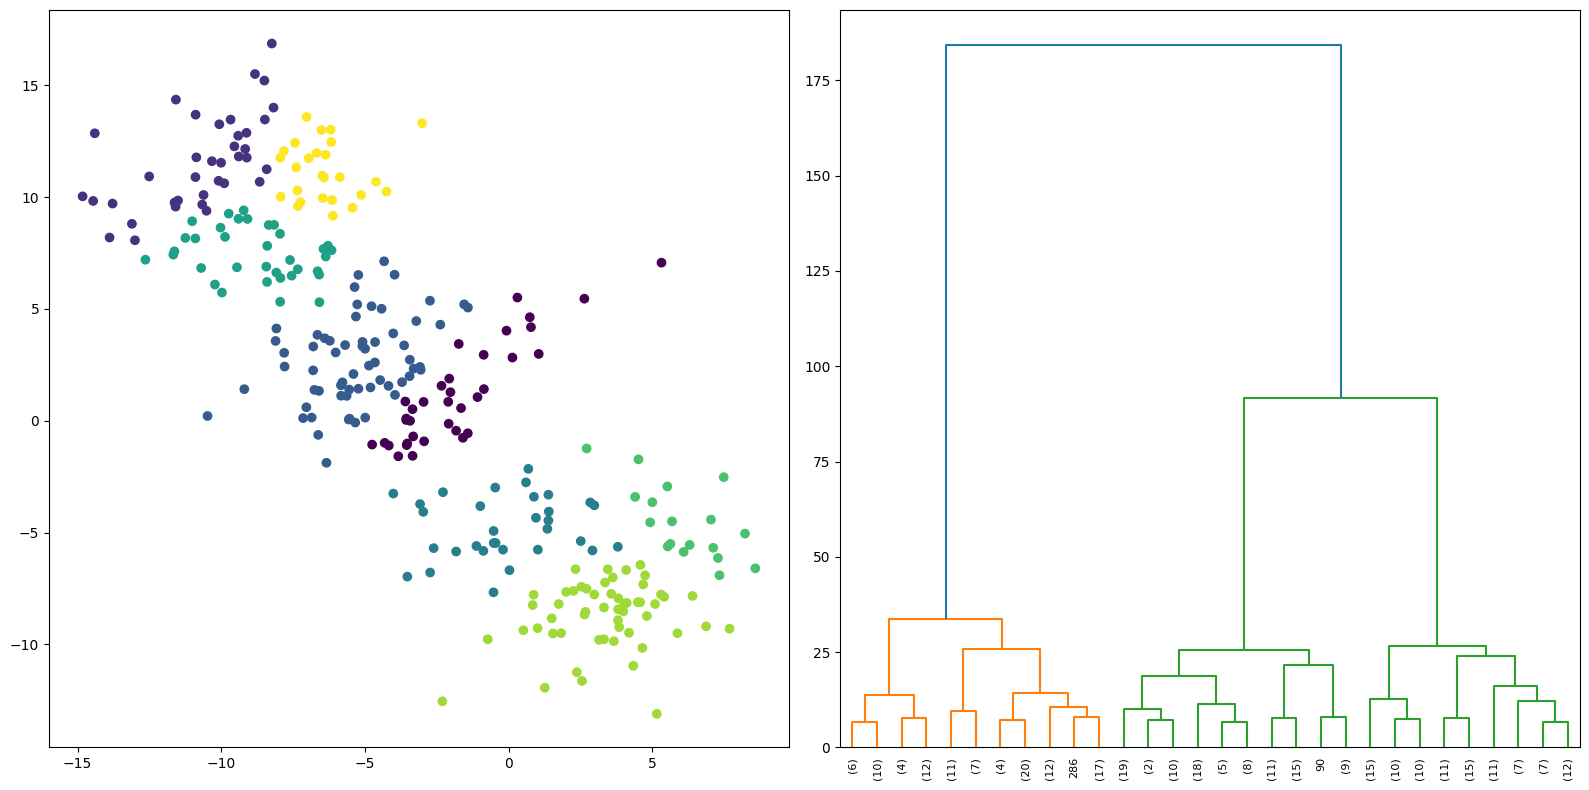

Clusters : 9 		 Silhouette score 0.33479076030857224 		  Davies-Bouldin Index 0.8723686526174617


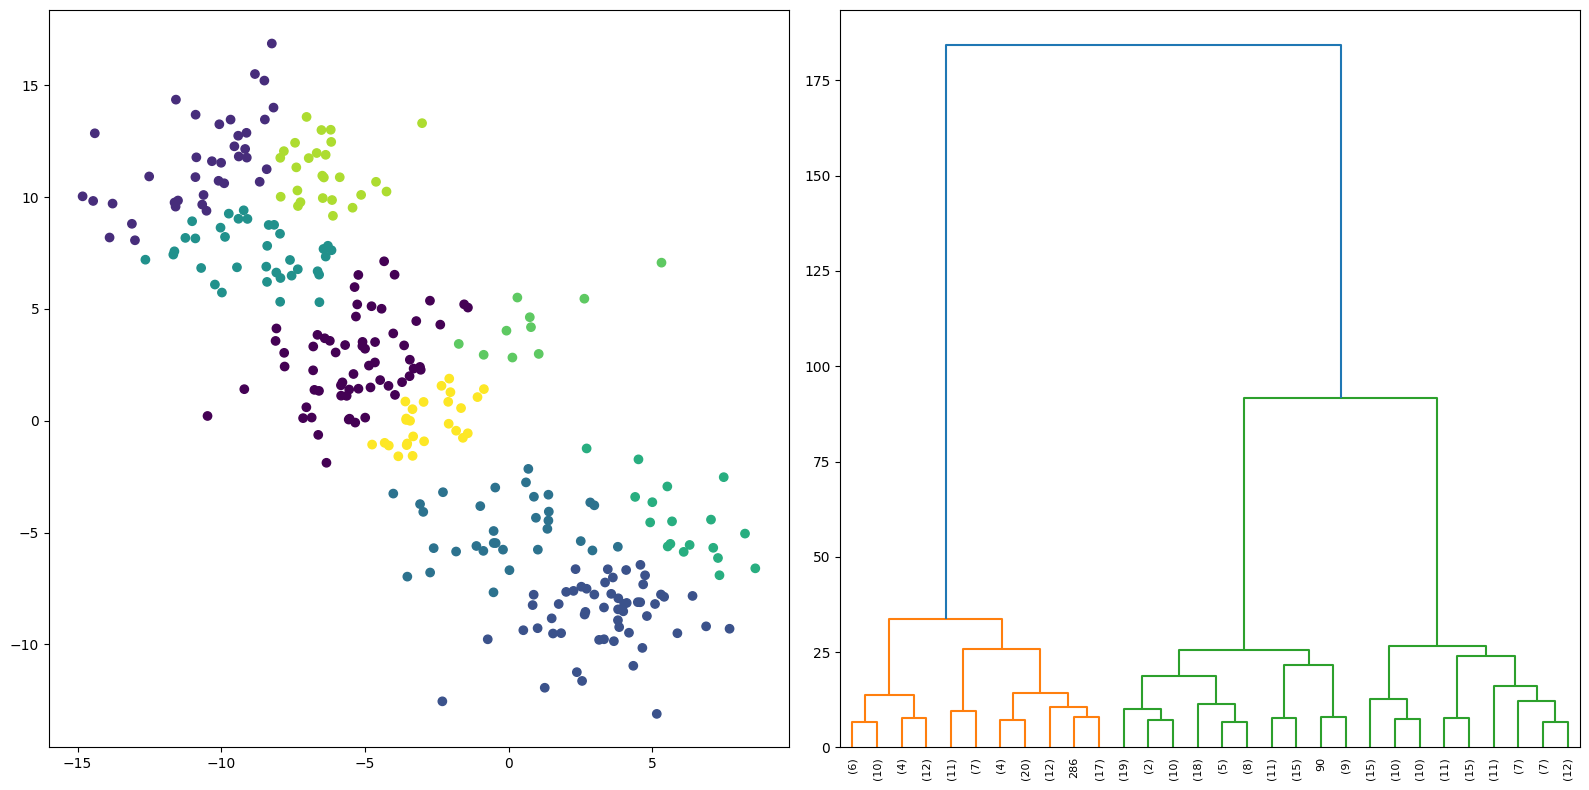

Clusters : 10 		 Silhouette score 0.34937256091047075 		  Davies-Bouldin Index 0.8867807023586793


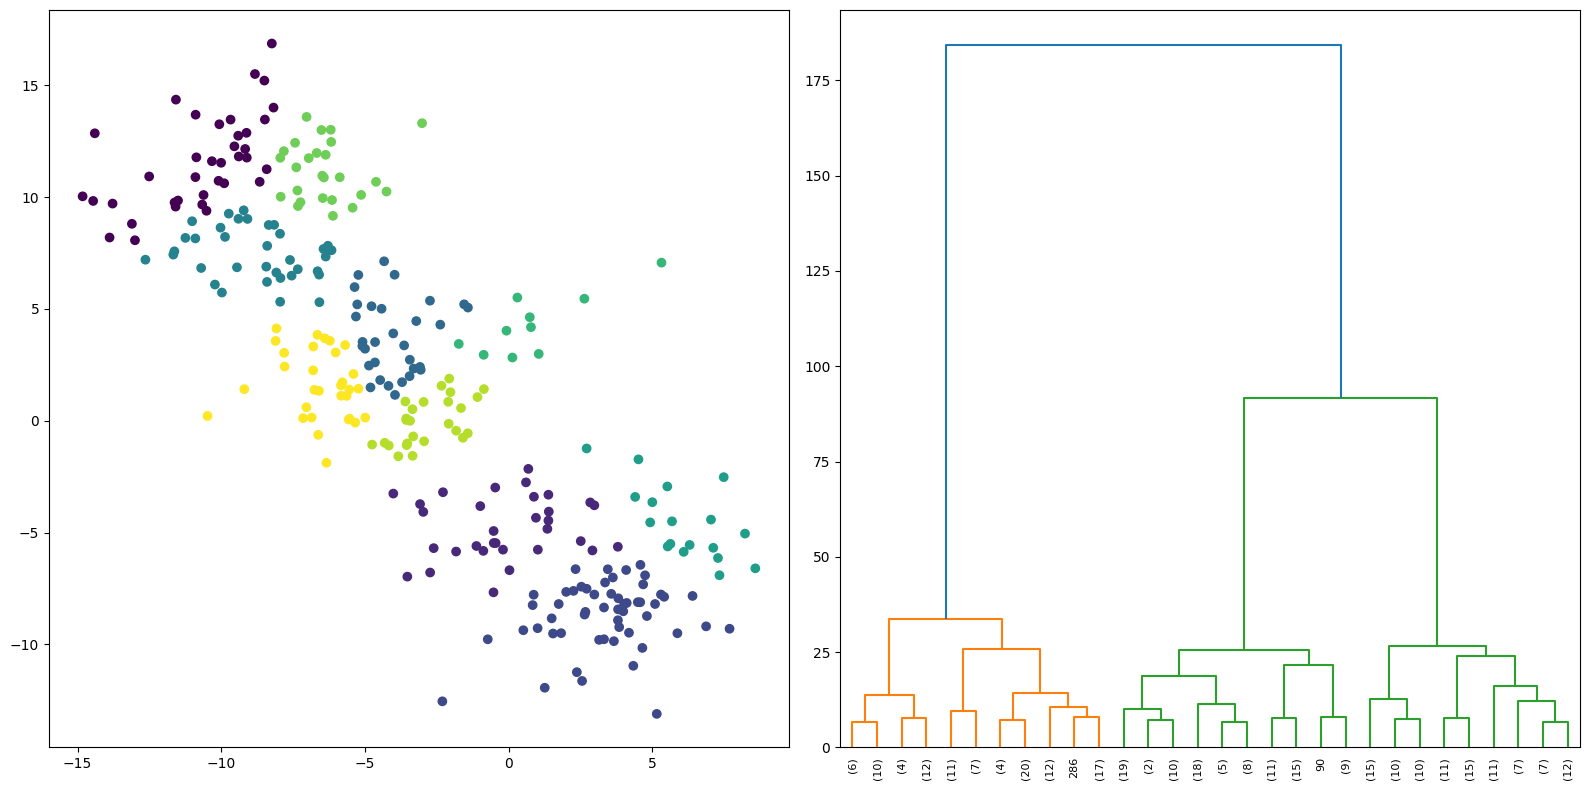

In [267]:
for k in range(2,11):

    aglc = AgglomerativeClustering(
    linkage = 'ward',
    n_clusters = k
    )
    
    y_pred = aglc.fit_predict(X)

    print(f'Clusters : {k} \t\t Silhouette score {silhouette_score(X,y_pred)} \t\t  Davies-Bouldin Index {davies_bouldin_score(X,y_pred)}')
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

    ax1.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    )
    

    Z = sch.linkage(
        X,
        method = 'ward'
    )

    dend = sch.dendrogram(
        Z,
        leaf_font_size = 8,
        leaf_rotation = 90,
        truncate_mode = 'lastp',
        ax = ax2
    )

    plt.tight_layout()
    plt.show()
